##Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Imports

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from google.colab.patches import cv2_imshow
from collections import OrderedDict

## Downloading Dataset

**This Data contain samples of A-Z,a-z and 0-9**

In [ ]:
!wget http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishImg.tgz 

--2021-06-10 15:46:08--  http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishImg.tgz
Resolving www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)... 131.227.80.48
Connecting to www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)|131.227.80.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133975105 (128M) [application/x-gzip]
Saving to: ‘EnglishImg.tgz.2’

EnglishImg.tgz.2    100%[===================>] 127.77M  11.1MB/s    in 13s     

2021-06-10 15:46:22 (9.56 MB/s) - ‘EnglishImg.tgz.2’ saved [133975105/133975105]



## Untar the data file

In [ ]:
!tar -zxf '/content/EnglishImg.tgz.2' -C '/gdrive/MyDrive/Colab Notebooks/OCR/Data'

In [ ]:
path='/gdrive/MyDrive/Colab Notebooks/OCR/Data/English/Img/GoodImg/Bmp'

## Data Preprocessing

In [ ]:
folders=[]

In [ ]:
for root, dirnames, filenames in os.walk(path):
    for j in dirnames:
      folders.append(j)
    #print("filenames",filenames)
  #print('root   ',root,',  dirnames: - ',dirnames,'   filenames',filenames)

In [ ]:
len(folders)

62

In [ ]:
files={}

In [ ]:
for i in folders:
  files[i]=os.listdir("/gdrive/MyDrive/Colab Notebooks/OCR/Data/English/Img/GoodImg/Bmp/"+i)
  #files.add(os.listdir("/content/English/Img/BadImag/Bmp/"+i))

In [ ]:
# sorting files according to their names in accending order
dict1 = OrderedDict(sorted(files.items()))

In [ ]:
dict1.keys()

odict_keys(['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample053', 'Sample054', 'Sample055', 'Sample056', 'Sample057', 'Sample058', 'Sample059', 'Sample060', 'Sample061', 'Sample062'])

In [ ]:
dict1['Sample001']

['img001-00049.png',
 'img001-00015.png',
 'img001-00075.png',
 'img001-00080.png',
 'img001-00083.png',
 'img001-00057.png',
 'img001-00002.png',
 'img001-00076.png',
 'img001-00026.png',
 'img001-00096.png',
 'img001-00091.png',
 'img001-00007.png',
 'img001-00048.png',
 'img001-00067.png',
 'img001-00092.png',
 'img001-00072.png',
 'img001-00018.png',
 'img001-00009.png',
 'img001-00040.png',
 'img001-00025.png',
 'img001-00081.png',
 'img001-00094.png',
 'img001-00027.png',
 'img001-00101.png',
 'img001-00030.png',
 'img001-00074.png',
 'img001-00022.png',
 'img001-00063.png',
 'img001-00005.png',
 'img001-00065.png',
 'img001-00103.png',
 'img001-00033.png',
 'img001-00037.png',
 'img001-00055.png',
 'img001-00086.png',
 'img001-00014.png',
 'img001-00069.png',
 'img001-00034.png',
 'img001-00042.png',
 'img001-00064.png',
 'img001-00088.png',
 'img001-00013.png',
 'img001-00041.png',
 'img001-00068.png',
 'img001-00061.png',
 'img001-00059.png',
 'img001-00046.png',
 'img001-0001

In [ ]:
f = open("labels.txt", "a")
for i in dict1.keys():
  for j in dict1[i]:
    f.write("English/Img/GoodImg"+i+"/"+j+"\n")
f.close()

In [ ]:
l="0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

**Creating labels and data** 

In [ ]:
data=[]
labels=[]
tmp=0

In [ ]:
img=cv2.imread('/gdrive/MyDrive/Colab Notebooks/OCR/Data/English/Img/GoodImg/Bmp/Sample041/img041-00190.png')

In [ ]:
img.shape

(62, 43, 3)

In [ ]:
img = cv2.cvtColor(cv2.imread('/gdrive/MyDrive/Colab Notebooks/OCR/Data/English/Img/GoodImg/Bmp/Sample041/img041-00190.png'), cv2.COLOR_BGR2GRAY)   


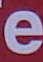

In [ ]:
cv2_imshow(cv2.imread('/gdrive/MyDrive/Colab Notebooks/OCR/Data/English/Img/GoodImg/Bmp/Sample041/img041-00190.png'))

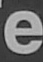

In [ ]:
cv2_imshow(img)

### Convert image to 28x28

In [ ]:
def conTO28x28(path):
  #img = cv2.cvtColor(cv2.imread('/gdrive/MyDrive/Colab Notebooks/OCR/Data/English/Img/GoodImg/Bmp/Sample041/img041-00190.png'), cv2.COLOR_BGR2GRAY)   
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)   

  # convert each image of shape (32, 28, 1)
  w, h = img.shape
  if h > 28 or w > 28:
    (tH, tW) = img.shape
    dX = int(max(0, 28 - tW) / 2.0)
    dY = int(max(0, 28 - tH) / 2.0)

    img = cv2.copyMakeBorder(img, top=dY, bottom=dY,
          left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
          value=(0, 0, 0))
    img = cv2.resize(img, (28, 28))

  w, h = img.shape

  if w < 28:
      add_zeros = np.ones((28-w, h))*255
      img = np.concatenate((img, add_zeros))

  if h < 28:
      add_zeros = np.ones((28, 28-h))*255
      img = np.concatenate((img, add_zeros), axis=1)
  #img = np.expand_dims(img, axis=2)
  # Normalize each image
  return img

In [ ]:
cv2_imshow(cv2.imread('/gdrive/MyDrive/Colab Notebooks/OCR/Data/English/Img/GoodImg/Bmp/Sample001/img001-00001.png'))

In [ ]:
image = conTO32x32('/gdrive/MyDrive/Colab Notebooks/OCR/Data/English/Img/GoodImg/Bmp/Sample001/img001-00001.png')

In [ ]:
image.shape

(28, 28)

In [ ]:
cv2_imshow(image)

**Giving Labels to images**

In [ ]:
for i in dict1.keys():
  for j in dict1[i]:
    # labels list contains labels of images 
    labels.append(tmp)
    #image=cv2.imread('/gdrive/MyDrive/Colab Notebooks/OCR/Data/English/Img/GoodImg/Bmp/'+i+"/"+j)
    image = conTO32x32('/gdrive/MyDrive/Colab Notebooks/OCR/Data/English/Img/GoodImg/Bmp/'+i+"/"+j)
    # Data list containing images in the form of numpy array 
    data.append(image)
  tmp+=1

In [ ]:
from numpy import save

In [ ]:
len(labels)

7705

In [ ]:
labels = np.array(labels, dtype="int")
data = np.array(data, dtype='float32')

In [ ]:
tmp

62

In [ ]:
labels

array([ 0,  0,  0, ..., 61, 61, 61])

In [ ]:
save('data.npy', data)
save('labels.npy', labels)

In [ ]:
tmp_data = np.load('data.npy')

In [ ]:
tmp_data.shape

(7705, 28, 28)

### Combining Mnist and A-Z datasets from kaggle

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
def load_az_dataset(datasetPath):
  data = []
  labels = []
  for row in open(datasetPath):
    row = row.split(",")
    label = int(row[0])
    image = np.array([int(x) for x in row[1:]], dtype="uint8")
    image = image.reshape((28, 28))
    data.append(image)
    labels.append(label)
  data = np.array(data, dtype='float32')
  labels = np.array(labels, dtype="int")
  return (data, labels)

In [ ]:
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
(azData, azLabels) = load_az_dataset('/gdrive/MyDrive/Colab Notebooks/OCR/Data/A_Z Handwritten Data.csv')

In [ ]:
azData.shape

(372451, 28, 28)

**Stacking up the training set and test set of mnist**

In [ ]:
mnist_data = np.vstack([trainData, testData])
mnist_labels = np.hstack([trainLabels, testLabels])

In [ ]:
trainData.shape

(60000, 28, 28)

In [ ]:
mnist_data[0].shape

(28, 28)

In [ ]:
"""4799==0
label[4799]=0
a-z[4809]=a
label[4809]=37"""

In [ ]:
labels.shape

(7705,)

In [ ]:
azLabels+=10

**Stacking up all the three datasets**

In [ ]:
labels1=np.hstack([mnist_labels,labels,azLabels])
data1=np.vstack([mnist_data,data,azData])

In [ ]:
labels1.shape

(450156,)

In [ ]:
data1.shape

(450156, 28, 28)

**Save combined dataset into .npy file for future use.**

In [ ]:
save('/gdrive/MyDrive/Colab Notebooks/OCR/Data/combined_data.npy', data1)
save('/gdrive/MyDrive/Colab Notebooks/OCR/Data/combine_labels.npy', labels1)

In [ ]:
loaded_data = np.load('/gdrive/MyDrive/Colab Notebooks/OCR/Data/combined_data.npy')
loaded_labels = np.load('/gdrive/MyDrive/Colab Notebooks/OCR/Data/combine_labels.npy')

In [ ]:
loaded_data.shape

(450156, 28, 28)

In [ ]:
loaded_labels.shape

(450156,)

In [ ]:
cv2_imshow(loaded_data[-50000])

In [ ]:
tmp_image = cv2.resize(loaded_data[0], (32, 32))

In [ ]:
tmp_image.shape

(32, 32)

In [ ]:
data = [cv2.resize(image, (32, 32)) for image in loaded_data]
data = np.array(data, dtype="float32")

In [ ]:
data.shape

(450156, 32, 32)

In [ ]:
data2 = np.expand_dims(data, axis=-1)

In [ ]:
data2.shape

(450156, 32, 32, 1)

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(loaded_labels)
counts = labels.sum(axis=0)

In [ ]:
labels[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Calculating class weight in dataset**

In [ ]:
classTotals = labels.sum(axis=0)
classWeight = {}
# loop over all classes and calculate the class weight
for i in range(0, len(classTotals)):
	classWeight[i] = classTotals.max() / classTotals[i]

In [ ]:
classWeight

{0: 8.305793378995434,
 1: 7.316113624937154,
 2: 8.244617563739377,
 3: 8.094423585036852,
 4: 8.471401542715762,
 5: 9.127646228634154,
 6: 8.387175792507204,
 7: 7.929028742678109,
 8: 8.488697681201693,
 9: 8.324799771167047,
 10: 4.034308289437205,
 11: 6.6272344301491515,
 12: 2.463892651540806,
 13: 5.637481840193705,
 14: 4.897105838801952,
 15: 46.86553945249597,
 16: 9.857239627434378,
 17: 7.85413574416408,
 18: 40.933192686357245,
 19: 6.791948658109685,
 20: 10.22071992976295,
 21: 4.932378611982036,
 22: 4.662154585502603,
 23: 3.004542404377226,
 24: 1.0,
 25: 2.984974358974359,
 26: 9.955019668205917,
 27: 4.868841488916771,
 28: 1.1937203912963228,
 29: 2.5521550401192616,
 30: 2.000240549828179,
 31: 13.644397562119082,
 32: 5.364206063957239,
 33: 9.163570528967254,
 34: 5.327384221123925,
 35: 9.493883542652096,
 36: 368.3987341772152,
 37: 1531.7631578947369,
 38: 923.9206349206349,
 39: 1265.3695652173913,
 40: 256.4185022026432,
 41: 1573.162162162162,
 42: 1616.

In [ ]:
print("Data shape: -",data2.shape)
print("labels shape: -",labels.shape)

Data shape: - (450156, 32, 32, 1)
labels shape: - (450156, 62)


## Spliting data into 75% training and 25% test set

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data2,
	labels, test_size=0.25, stratify=labels, random_state=42)

In [ ]:
trainX.shape

(337617, 32, 32, 1)

## Performing data augmentation

In [ ]:
aug = ImageDataGenerator(
	rotation_range=10,
	zoom_range=0.05,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.15,
	horizontal_flip=False,
	fill_mode="nearest")

## Building Resnet Model

In [ ]:
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import add
from keras.regularizers import l2
from keras import backend as K

class ResNet:
	@staticmethod
	def residual_module(data, K, stride, chanDim, red=False,
		reg=0.0001, bnEps=2e-5, bnMom=0.9):
		# the shortcut branch of the ResNet module should be
		# initialize as the input (identity) data
		shortcut = data

		# the first block of the ResNet module are the 1x1 CONVs
		bn1 = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(data)
		act1 = Activation("relu")(bn1)
		conv1 = Conv2D(int(K * 0.25), (1, 1), use_bias=False,
			kernel_regularizer=l2(reg))(act1)

		# the second block of the ResNet module are the 3x3 CONVs
		bn2 = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(conv1)
		act2 = Activation("relu")(bn2)
		conv2 = Conv2D(int(K * 0.25), (3, 3), strides=stride,
			padding="same", use_bias=False,
			kernel_regularizer=l2(reg))(act2)

		# the third block of the ResNet module is another set of 1x1
		# CONVs
		bn3 = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(conv2)
		act3 = Activation("relu")(bn3)
		conv3 = Conv2D(K, (1, 1), use_bias=False,
			kernel_regularizer=l2(reg))(act3)

		# if we are to reduce the spatial size, apply a CONV layer to
		# the shortcut
		if red:
			shortcut = Conv2D(K, (1, 1), strides=stride,
				use_bias=False, kernel_regularizer=l2(reg))(act1)

		# add together the shortcut and the final CONV
		x = add([conv3, shortcut])

		# return the addition as the output of the ResNet module
		return x

	@staticmethod
	def build(width, height, depth, classes, stages, filters,
		reg=0.0001, bnEps=2e-5, bnMom=0.9, dataset="cifar"):
		# initialize the input shape to be "channels last" and the
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		# set the input and apply BN
		inputs = Input(shape=inputShape)
		x = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(inputs)

		# check if we are utilizing the CIFAR dataset
		if dataset == "cifar":
			# apply a single CONV layer
			x = Conv2D(filters[0], (3, 3), use_bias=False,
				padding="same", kernel_regularizer=l2(reg))(x)

		# check to see if we are using the Tiny ImageNet dataset
		elif dataset == "tiny_imagenet":
			# apply CONV => BN => ACT => POOL to reduce spatial size
			x = Conv2D(filters[0], (5, 5), use_bias=False,
				padding="same", kernel_regularizer=l2(reg))(x)
			x = BatchNormalization(axis=chanDim, epsilon=bnEps,
				momentum=bnMom)(x)
			x = Activation("relu")(x)
			x = ZeroPadding2D((1, 1))(x)
			x = MaxPooling2D((3, 3), strides=(2, 2))(x)

		# loop over the number of stages
		for i in range(0, len(stages)):
			# initialize the stride, then apply a residual module
			# used to reduce the spatial size of the input volume
			stride = (1, 1) if i == 0 else (2, 2)
			x = ResNet.residual_module(x, filters[i + 1], stride,
				chanDim, red=True, bnEps=bnEps, bnMom=bnMom)

			# loop over the number of layers in the stage
			for j in range(0, stages[i] - 1):
				# apply a ResNet module
				x = ResNet.residual_module(x, filters[i + 1],
					(1, 1), chanDim, bnEps=bnEps, bnMom=bnMom)

		# apply BN => ACT => POOL
		x = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(x)
		x = Activation("relu")(x)
		x = AveragePooling2D((8, 8))(x)

		# softmax classifier
		x = Flatten()(x)
		x = Dense(classes, kernel_regularizer=l2(reg))(x)
		x = Activation("softmax")(x)

		# create the model
		model = Model(inputs, x, name="resnet")

		# return the constructed network architecture
		return model

In [ ]:
EPOCHS = 10 # Train mode for 10 epochs
INIT_LR = 1e-1 # Take initial learning rate as 0.01
BS = 256 # Taking batch size of 256

In [ ]:
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

## Compling model

In [ ]:
print("[INFO] compiling model...")
opt = SGD(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS) # Using SGD(Schotastic Gradient Descent) as optimizer

model = ResNet.build(32, 32, 1, len(le.classes_), (3, 3, 3),
	(64, 64, 128, 256), reg=0.0005)

model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


## Fit Model Function

In [ ]:
import numpy as np

In [ ]:
import os


In [ ]:
checkpoint_path = "/gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/training_1/cp.ckpt"

In [ ]:
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
EPOCHS=50

## Train Model

**Train Model for 50 epochs**

In [ ]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS,
	class_weight=classWeight,
	verbose=1,
  callbacks=[cp_callback])
model.save('/gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_50_Epochs',save_format='.h5')

Epoch 1/50
1318/1318 [==============================] - 188s 143ms/step - loss: 31.2867 - accuracy: 0.1044 - val_loss: 6.8277 - val_accuracy: 0.0747

Epoch 00001: saving model to /gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/training_1/cp.ckpt
Epoch 2/50
1318/1318 [==============================] - 188s 143ms/step - loss: 27.9640 - accuracy: 0.2066 - val_loss: 5.5421 - val_accuracy: 0.2517

Epoch 00002: saving model to /gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/training_1/cp.ckpt
Epoch 3/50
1318/1318 [==============================] - 206s 156ms/step - loss: 26.0784 - accuracy: 0.3042 - val_loss: 5.2493 - val_accuracy: 0.3786

Epoch 00003: saving model to /gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/training_1/cp.ckpt
Epoch 4/50
1318/1318 [==============================] - 206s 156ms/step - loss: 24.4719 - accuracy: 0.4104 - val_loss: 5.0080 - val_accuracy: 0.4063

Epoch 00004: saving model to /gdrive/MyDrive/Colab Notebooks/OCR

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_50_Epochs/assets


**Save model**

In [ ]:
model.save('/gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_50_Epochs.h5',save_format='.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


**Evaluate model on test set**

In [ ]:
labelNames = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
labelNames = [l for l in labelNames]
print("[INFO] evaluating network ")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=labelNames,zero_division=0))

[INFO] evaluating network 
              precision    recall  f1-score   support

           0       0.19      0.68      0.30      1752
           1       0.95      0.94      0.95      1989
           2       0.82      0.73      0.77      1765
           3       0.82      0.93      0.87      1798
           4       0.75      0.82      0.78      1718
           5       0.37      0.70      0.48      1594
           6       0.79      0.88      0.83      1735
           7       0.78      0.91      0.84      1835
           8       0.64      0.86      0.74      1714
           9       0.82      0.90      0.85      1748
           A       0.91      0.86      0.88      3607
           B       0.81      0.86      0.83      2196
           C       0.96      0.91      0.94      5906
           D       0.84      0.79      0.81      2581
           E       0.95      0.87      0.91      2972
           F       0.81      0.94      0.87       310
           G       0.68      0.82      0.74      1476


### Train model for more 30 epochs

In [ ]:
EPOCHS=30

In [ ]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS,
	class_weight=classWeight,
	verbose=1)
model.save('/gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_80_Epochs',save_format='.h5')

Epoch 1/30
1318/1318 [==============================] - 189s 143ms/step - loss: 21.2898 - accuracy: 0.5785 - val_loss: 3.9176 - val_accuracy: 0.7325
Epoch 2/30
1318/1318 [==============================] - 188s 142ms/step - loss: 17.7236 - accuracy: 0.7396 - val_loss: 3.6679 - val_accuracy: 0.7950
Epoch 3/30
1318/1318 [==============================] - 187s 142ms/step - loss: 16.6384 - accuracy: 0.7777 - val_loss: 3.6314 - val_accuracy: 0.7781
Epoch 4/30
1318/1318 [==============================] - 187s 142ms/step - loss: 15.9826 - accuracy: 0.7981 - val_loss: 3.5541 - val_accuracy: 0.8096
Epoch 5/30
1318/1318 [==============================] - 187s 142ms/step - loss: 15.4061 - accuracy: 0.8076 - val_loss: 3.9306 - val_accuracy: 0.6564
Epoch 6/30
1318/1318 [==============================] - 187s 142ms/step - loss: 15.1653 - accuracy: 0.8134 - val_loss: 3.5071 - val_accuracy: 0.8331
Epoch 7/30
1318/1318 [==============================] - 187s 142ms/step - loss: 14.4704 - accuracy: 0.8183

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_80_Epochs/assets


In [ ]:
model.save('/gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_80_Epochs',save_format='.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_80_Epochs/assets


### Evaluate for 80 epochs

In [ ]:
labelNames = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
labelNames = [l for l in labelNames]
print("[INFO] evaluating network ")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=labelNames,zero_division=0))

[INFO] evaluating network 
              precision    recall  f1-score   support

           0       0.18      0.78      0.29      1752
           1       0.91      0.96      0.93      1989
           2       0.82      0.82      0.82      1765
           3       0.90      0.92      0.91      1798
           4       0.74      0.84      0.79      1718
           5       0.41      0.76      0.53      1594
           6       0.78      0.92      0.85      1735
           7       0.80      0.94      0.86      1835
           8       0.70      0.89      0.78      1714
           9       0.85      0.93      0.89      1748
           A       0.94      0.87      0.90      3607
           B       0.94      0.78      0.85      2196
           C       0.97      0.92      0.95      5906
           D       0.89      0.82      0.85      2581
           E       0.98      0.89      0.93      2972
           F       0.81      0.92      0.86       310
           G       0.78      0.77      0.78      1476


In [ ]:
EPOCHS=20

### Train for more 20 epochs

In [ ]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS,
	class_weight=classWeight,
	verbose=1)
model.save('/gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_100_Epochs',save_format='.h5')

Epoch 1/20
1318/1318 [==============================] - 187s 142ms/step - loss: 10.2421 - accuracy: 0.8457 - val_loss: 3.3809 - val_accuracy: 0.8514
Epoch 2/20
1318/1318 [==============================] - 187s 142ms/step - loss: 10.0791 - accuracy: 0.8454 - val_loss: 3.4074 - val_accuracy: 0.8383
Epoch 3/20
1318/1318 [==============================] - 186s 141ms/step - loss: 10.0754 - accuracy: 0.8476 - val_loss: 3.3890 - val_accuracy: 0.8422
Epoch 4/20
1318/1318 [==============================] - 186s 141ms/step - loss: 10.0091 - accuracy: 0.8467 - val_loss: 3.3967 - val_accuracy: 0.8470
Epoch 5/20
1318/1318 [==============================] - 186s 142ms/step - loss: 9.8191 - accuracy: 0.8471 - val_loss: 3.4068 - val_accuracy: 0.8372
Epoch 6/20
1318/1318 [==============================] - 187s 142ms/step - loss: 9.8357 - accuracy: 0.8473 - val_loss: 3.3891 - val_accuracy: 0.8499
Epoch 7/20
1318/1318 [==============================] - 187s 142ms/step - loss: 9.7272 - accuracy: 0.8485 - 

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_100_Epochs/assets


### Evaluate for 100 Epochs

In [ ]:
labelNames = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
labelNames = [l for l in labelNames]
print("[INFO] evaluating network ")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=labelNames,zero_division=0))

[INFO] evaluating network 
              precision    recall  f1-score   support

           0       0.17      0.79      0.28      1752
           1       0.92      0.96      0.94      1989
           2       0.84      0.81      0.82      1765
           3       0.91      0.92      0.92      1798
           4       0.70      0.89      0.78      1718
           5       0.47      0.74      0.58      1594
           6       0.83      0.92      0.87      1735
           7       0.82      0.94      0.88      1835
           8       0.71      0.89      0.79      1714
           9       0.83      0.93      0.88      1748
           A       0.93      0.89      0.91      3607
           B       0.93      0.81      0.87      2196
           C       0.97      0.94      0.95      5906
           D       0.88      0.84      0.86      2581
           E       0.98      0.90      0.94      2972
           F       0.79      0.95      0.86       310
           G       0.84      0.78      0.81      1476


### Train for more 20 epochs

In [ ]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS,
	class_weight=classWeight,
	verbose=1)
model.save('/gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_120_Epochs',save_format='.h5')

Epoch 1/20
1318/1318 [==============================] - 184s 140ms/step - loss: 8.7551 - accuracy: 0.8529 - val_loss: 3.3618 - val_accuracy: 0.8489
Epoch 2/20
1318/1318 [==============================] - 187s 142ms/step - loss: 8.8098 - accuracy: 0.8530 - val_loss: 3.3661 - val_accuracy: 0.8523
Epoch 3/20
1318/1318 [==============================] - 187s 142ms/step - loss: 8.5839 - accuracy: 0.8512 - val_loss: 3.3778 - val_accuracy: 0.8441
Epoch 4/20
1318/1318 [==============================] - 187s 142ms/step - loss: 8.6650 - accuracy: 0.8540 - val_loss: 3.3737 - val_accuracy: 0.8418
Epoch 5/20
1318/1318 [==============================] - 187s 142ms/step - loss: 8.6483 - accuracy: 0.8537 - val_loss: 3.3653 - val_accuracy: 0.8474
Epoch 6/20
1318/1318 [==============================] - 187s 142ms/step - loss: 8.4984 - accuracy: 0.8518 - val_loss: 3.3771 - val_accuracy: 0.8433
Epoch 7/20
1318/1318 [==============================] - 187s 142ms/step - loss: 8.4953 - accuracy: 0.8538 - val_

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_120_Epochs/assets


**Final evaluation of 120 epochs**

In [ ]:
labelNames = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
labelNames = [l for l in labelNames]
print("[INFO] evaluating network ")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=labelNames,zero_division=0))

[INFO] evaluating network 
              precision    recall  f1-score   support

           0       0.17      0.78      0.28      1752
           1       0.94      0.96      0.95      1989
           2       0.81      0.85      0.83      1765
           3       0.89      0.94      0.92      1798
           4       0.74      0.88      0.81      1718
           5       0.44      0.78      0.56      1594
           6       0.85      0.93      0.89      1735
           7       0.82      0.95      0.88      1835
           8       0.74      0.89      0.81      1714
           9       0.86      0.93      0.90      1748
           A       0.94      0.89      0.91      3607
           B       0.94      0.82      0.88      2196
           C       0.98      0.95      0.96      5906
           D       0.89      0.86      0.87      2581
           E       0.98      0.90      0.94      2972
           F       0.83      0.94      0.88       310
           G       0.84      0.82      0.83      1476


In [ ]:
model.save('/gdrive/MyDrive/Colab Notebooks/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_120_Epochs.h5',save_format='.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# save the model to disk
print("[INFO] serializing network...")
#model.save('first_model', save_format="h5")
# construct a plot that plots and saves the training history
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
#plt.savefig('plot')

[INFO] serializing network...


NameError: ignored

<Figure size 432x288 with 0 Axes>

## Model Depolyment

In [ ]:
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = load_model('/gdrive/MyDrive/internship/OCR/Models/CombineDatasetModels/final_model_resnet/Combined_Resnet_120_Epochs.h5')

In [ ]:
def predict_image(img):
  image = cv2.imread(img)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  edged = cv2.Canny(blurred, 30, 150)
  cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sort_contours(cnts, method="left-to-right")[0]
  chars = []


  #cv2_imshow(edged)

  for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
      # extract the character and threshold it to make the character
      # appear as *white* (foreground) on a *black* background, then
      # grab the width and height of the thresholded image
      roi = gray[y:y + h, x:x + w]
      thresh = cv2.threshold(roi, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
      (tH, tW) = thresh.shape
      # if the width is greater than the height, resize along the
      # width dimension
      if tW > tH:
        thresh = imutils.resize(thresh, width=32)
      # otherwise, resize along the height
      else:
        thresh = imutils.resize(thresh, height=32)
      (tH, tW) = thresh.shape
      dX = int(max(0, 32 - tW) / 2.0)
      dY = int(max(0, 32 - tH) / 2.0)
      # pad the image and force 32x32 dimensions
      padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
        left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
        value=(0, 0, 0))
      padded = cv2.resize(padded, (32, 32))
      padded = padded.astype("float32")
      padded = np.expand_dims(padded, axis=-1)
      chars.append((padded, (x, y, w, h)))
      cv2_imshow(padded)

    #print("Padded: -")
    #cv2_imshow(padded)

  """
  padded = cv2.copyMakeBorder(blurred, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
  padded = cv2.resize(padded, (32, 32))
  """
  #final_image=np.expand_dims(padded,axis=2)
  #print(chars)
  boxes = [b[1] for b in chars]
  #cv2_imshow(chars)
  chars = np.array([c[0] for c in chars], dtype="float32")
  # OCR the characters using our handwriting recognition model
  preds = model.predict(chars)
  # define the list of label names
  labelNames = "0123456789"
  labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
  labelNames = [l for l in labelNames]
  output=""
  for (pred, (x, y, w, h)) in zip(preds, boxes):
    i = np.argmax(pred)
    prob = pred[i]
    label = labelNames[i]
    output+=label
  
  return output

## Getting predictions

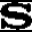

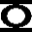

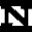

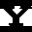

'SONU'

In [ ]:
predict_image('/content/sony.png')